In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [ ]:
# Read the CSV file into a pandas DataFrame
data = pd.read_csv('Bank.csv')

In [ ]:
# Display the first few rows of the DataFrame
print(data.head())

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


In [ ]:
# Get the shape of the DataFrame
print(data.shape)

(45211, 17)


In [ ]:
# Summary statistics of numerical variables
print(data.describe())

                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.

In [ ]:
# Count of unique values in categorical variables
print(data['job'].value_counts())

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64


In [ ]:
print(data['marital'].value_counts())

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64


In [ ]:
print(data['education'].value_counts())

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64


In [ ]:
print(data['default'].value_counts())

no     44396
yes      815
Name: default, dtype: int64


In [ ]:
print(data['housing'].value_counts())

yes    25130
no     20081
Name: housing, dtype: int64


In [ ]:
print(data['loan'].value_counts())

no     37967
yes     7244
Name: loan, dtype: int64


In [ ]:
print(data['contact'].value_counts())

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64


In [ ]:
print(data['month'].value_counts())

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64


In [ ]:
print(data['poutcome'].value_counts())

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64


In [ ]:
print(data['y'].value_counts())

no     39922
yes     5289
Name: y, dtype: int64


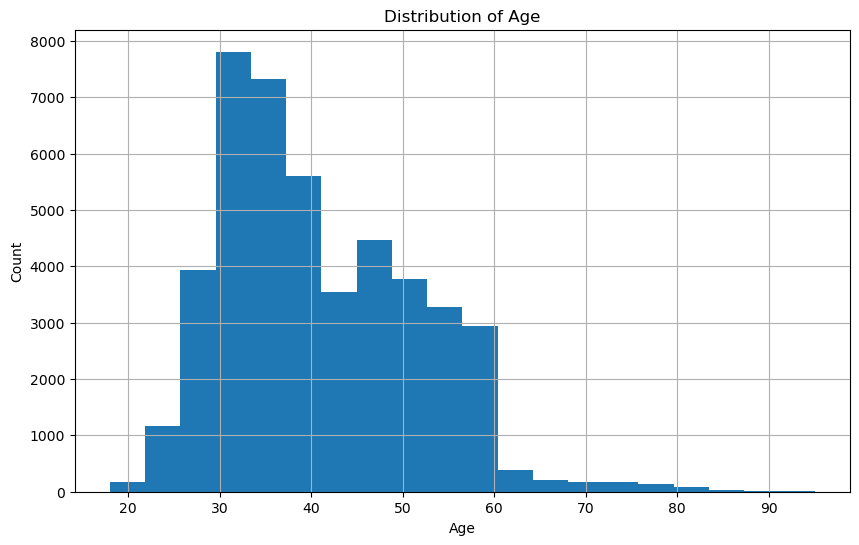

In [ ]:
# Plotting some visualizations
plt.figure(figsize=(10, 6))
data['age'].hist(bins=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()

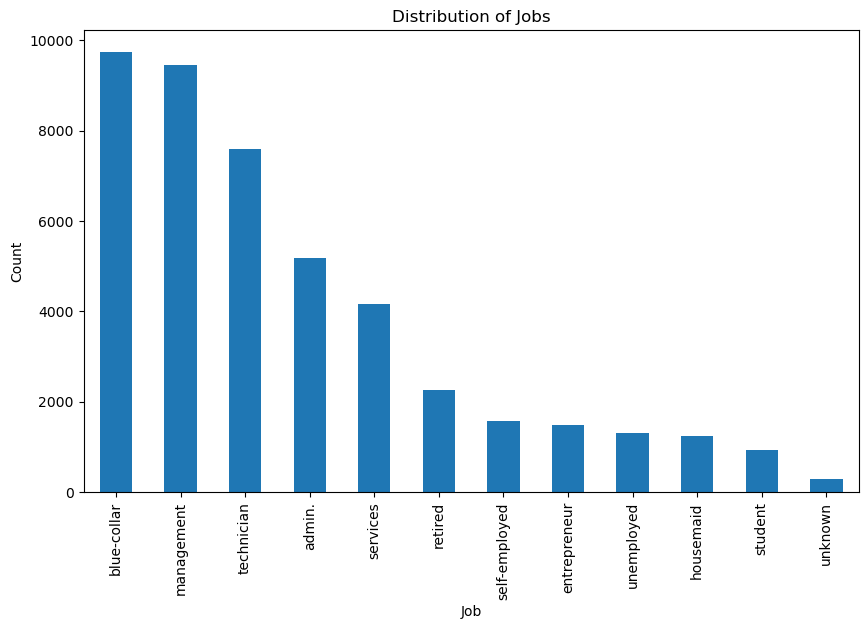

In [ ]:
plt.figure(figsize=(10, 6))
data['job'].value_counts().plot(kind='bar')
plt.xlabel('Job')
plt.ylabel('Count')
plt.title('Distribution of Jobs')
plt.show()

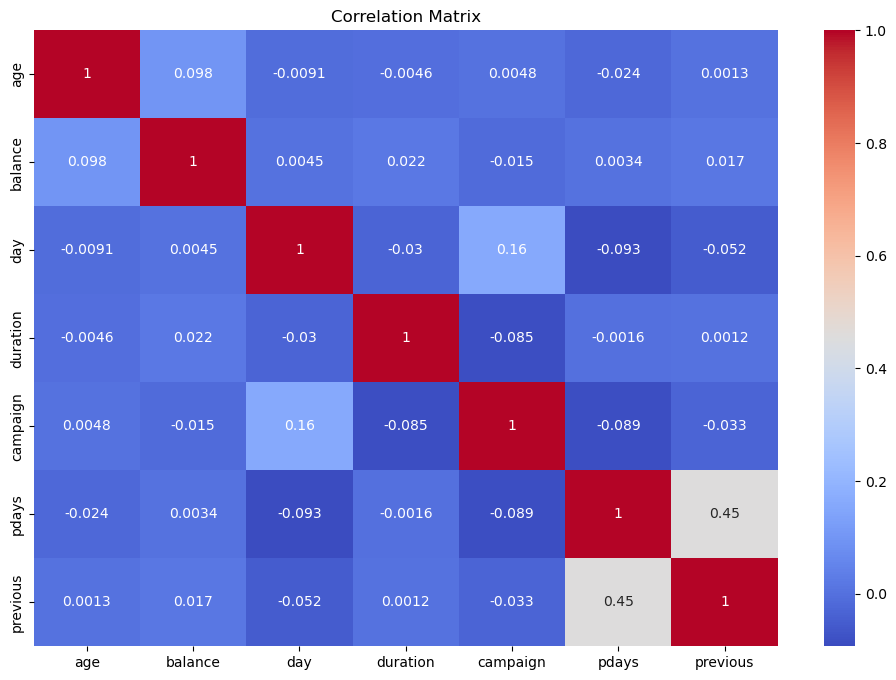

In [ ]:
# Plotting a correlation matrix
plt.figure(figsize=(12, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

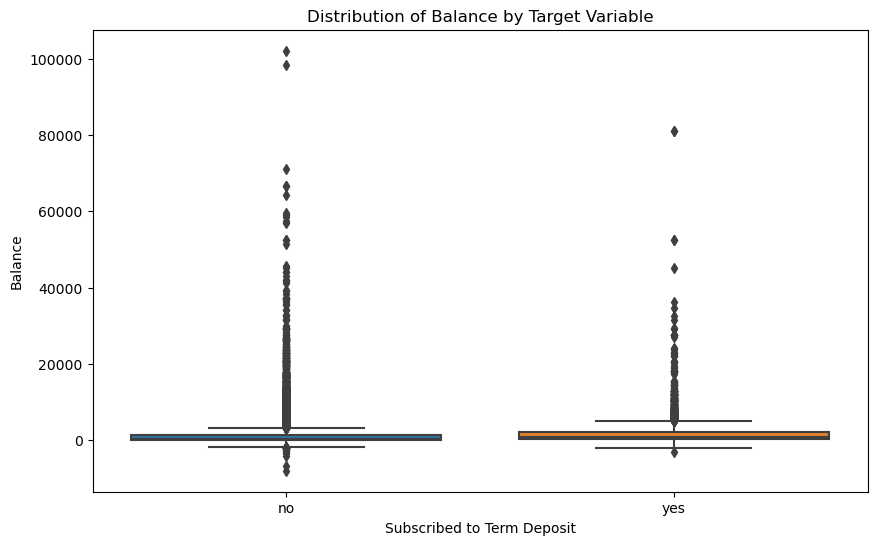

In [ ]:
# Distribution of balance by target variable
plt.figure(figsize=(10, 6))
sns.boxplot(x='y', y='balance', data=data)
plt.xlabel('Subscribed to Term Deposit')
plt.ylabel('Balance')
plt.title('Distribution of Balance by Target Variable')
plt.show()

<Figure size 1000x600 with 0 Axes>

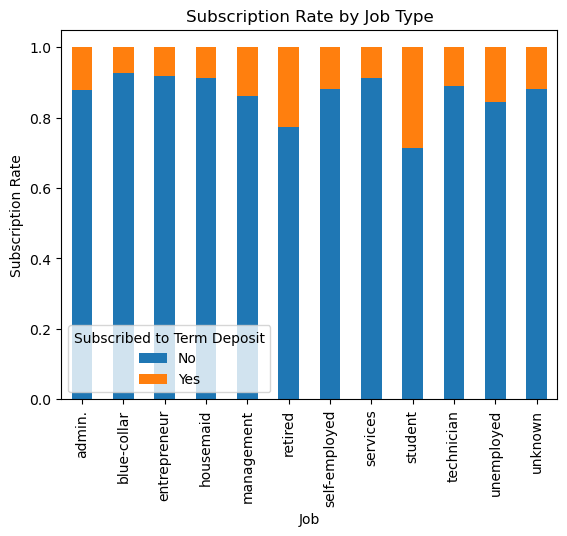

In [ ]:
# Subscription rate by job type
plt.figure(figsize=(10, 6))
job_subs = data.groupby('job')['y'].value_counts(normalize=True).unstack()
job_subs.plot(kind='bar', stacked='True')
plt.xlabel('Job')
plt.ylabel('Subscription Rate')
plt.title('Subscription Rate by Job Type')
plt.legend(title='Subscribed to Term Deposit', labels=['No', 'Yes'])
plt.show()

<Figure size 1000x600 with 0 Axes>

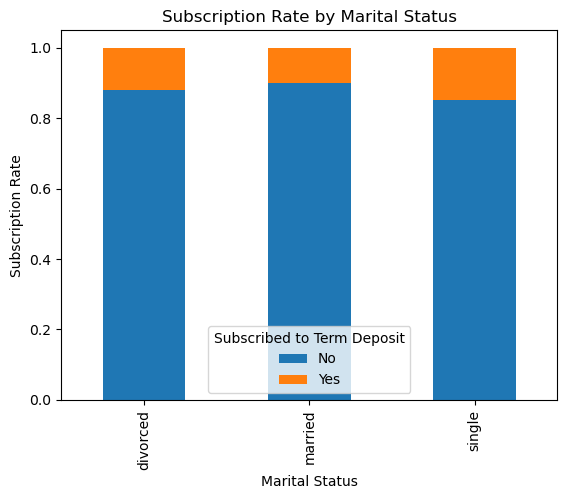

In [ ]:
# Subscription rate by marital status
plt.figure(figsize=(10, 6))
marital_subs = data.groupby('marital')['y'].value_counts(normalize=True).unstack()
marital_subs.plot(kind='bar', stacked='True')
plt.xlabel('Marital Status')
plt.ylabel('Subscription Rate')
plt.title('Subscription Rate by Marital Status')
plt.legend(title='Subscribed to Term Deposit', labels=['No', 'Yes'])
plt.show()

<Figure size 1000x600 with 0 Axes>

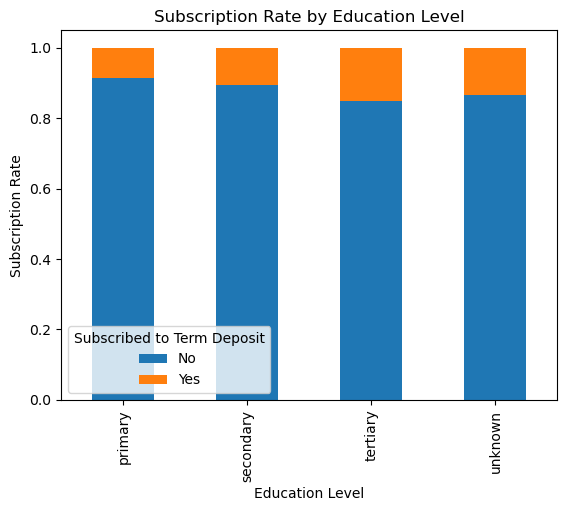

In [ ]:
# Subscription rate by education level
plt.figure(figsize=(10, 6))
education_subs = data.groupby('education')['y'].value_counts(normalize=True).unstack()
education_subs.plot(kind='bar', stacked='True')
plt.xlabel('Education Level')
plt.ylabel('Subscription Rate')
plt.title('Subscription Rate by Education Level')
plt.legend(title='Subscribed to Term Deposit', labels=['No', 'Yes'])
plt.show()

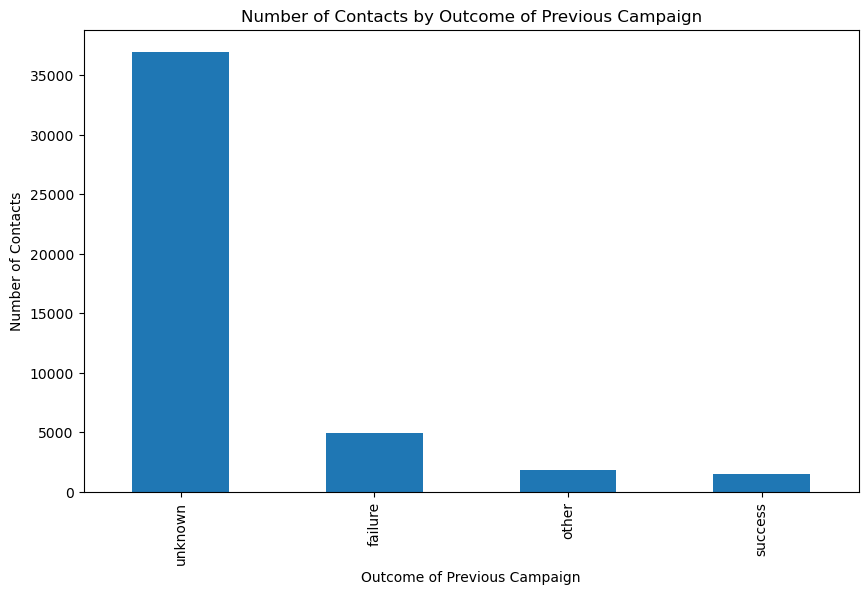

In [ ]:
# Number of contacts by outcome of previous campaign
plt.figure(figsize=(10, 6))
poutcome_counts = data['poutcome'].value_counts()
poutcome_counts.plot(kind='bar')
plt.xlabel('Outcome of Previous Campaign')
plt.ylabel('Number of Contacts')
plt.title('Number of Contacts by Outcome of Previous Campaign')
plt.show()

<Figure size 1000x600 with 0 Axes>

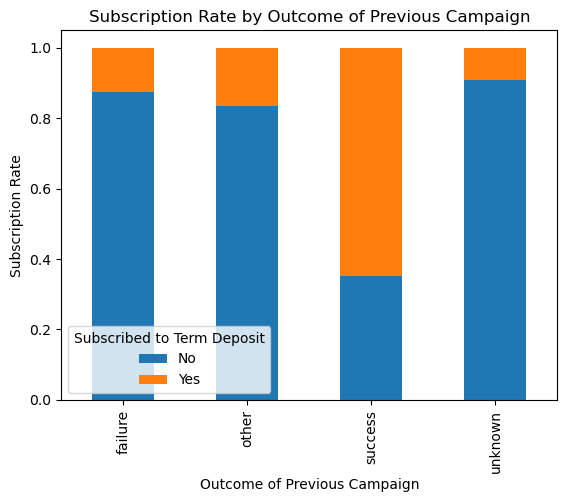

In [ ]:
# Subscription rate by outcome of previous campaign
plt.figure(figsize=(10, 6))
poutcome_subs = data.groupby('poutcome')['y'].value_counts(normalize=True).unstack()
poutcome_subs.plot(kind='bar', stacked='True')
plt.xlabel('Outcome of Previous Campaign')
plt.ylabel('Subscription Rate')
plt.title('Subscription Rate by Outcome of Previous Campaign')
plt.legend(title='Subscribed to Term Deposit', labels=['No', 'Yes'])
plt.show()

In [ ]:
# Check for missing values
print(data.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [ ]:
# Encode categorical variables using one-hot encoding
data_encoded = pd.get_dummies(data, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'])

In [ ]:
# Drop unnecessary columns
data_encoded.drop(['day'], axis=1, inplace=True)

In [ ]:
# Split the features and target variable
X = data_encoded.drop('y', axis=1)
y = data_encoded['y']

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)  # Select the number of components you want to keep
X_pca = pca.fit_transform(X)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Perform feature scaling using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_pca)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
# Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_confusion_matrix = confusion_matrix(y_test, rf_predictions)

In [ ]:
# SVM Classifier
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)
svm_predictions = svm_classifier.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_confusion_matrix = confusion_matrix(y_test, svm_predictions)

In [ ]:
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb

# Convert string labels to integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Train the XGBoost model
xgb_classifier = xgb.XGBClassifier()
eval_set = [(X_test, y_test)]
xgb_classifier.fit(X_train, y_train, eval_set=eval_set, eval_metric=['error', 'auc', 'logloss'])

# Make predictions on the test set
xgb_predictions = xgb_classifier.predict(X_test)

# Decode the predicted labels back to the original string labels
xgb_predictions_decoded = label_encoder.inverse_transform(xgb_predictions)

# Extract the evaluation results
eval_results = xgb_classifier.evals_result()

# Get the error values
xgb_error = eval_results['validation_0']['error']

# Calculate accuracy as (1 - error)
xgb_accuracy = [1 - err for err in xgb_error]

xgb_confusion_matrix = confusion_matrix(y_test, xgb_predictions)

# Get AUC and log loss values
xgb_auc = eval_results['validation_0']['auc']
xgb_loss = eval_results['validation_0']['logloss']

[0]	validation_0-error:0.10937	validation_0-auc:0.84670	validation_0-logloss:0.51798
[1]	validation_0-error:0.10826	validation_0-auc:0.85179	validation_0-logloss:0.42251
[2]	validation_0-error:0.10671	validation_0-auc:0.85747	validation_0-logloss:0.36472
[3]	validation_0-error:0.10727	validation_0-auc:0.86145	validation_0-logloss:0.32829
[4]	validation_0-error:0.10749	validation_0-auc:0.86428	validation_0-logloss:0.30396
[5]	validation_0-error:0.10738	validation_0-auc:0.86495	validation_0-logloss:0.28836


C:\Users\Sense Digital\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-error:0.10848	validation_0-auc:0.86692	validation_0-logloss:0.27781
[7]	validation_0-error:0.10561	validation_0-auc:0.86911	validation_0-logloss:0.27026
[8]	validation_0-error:0.10627	validation_0-auc:0.86969	validation_0-logloss:0.26550
[9]	validation_0-error:0.10627	validation_0-auc:0.87071	validation_0-logloss:0.26201
[10]	validation_0-error:0.10660	validation_0-auc:0.87132	validation_0-logloss:0.26005
[11]	validation_0-error:0.10539	validation_0-auc:0.87237	validation_0-logloss:0.25856
[12]	validation_0-error:0.10583	validation_0-auc:0.87288	validation_0-logloss:0.25755
[13]	validation_0-error:0.10572	validation_0-auc:0.87283	validation_0-logloss:0.25700
[14]	validation_0-error:0.10627	validation_0-auc:0.87283	validation_0-logloss:0.25664
[15]	validation_0-error:0.10627	validation_0-auc:0.87259	validation_0-logloss:0.25650
[16]	validation_0-error:0.10627	validation_0-auc:0.87261	validation_0-logloss:0.25646
[17]	validation_0-error:0.10638	validation_0-auc:0.87268	v

In [ ]:
# Print accuracies
print("Random Forest Classifier Accuracy:", rf_accuracy)
print("SVM Classifier Accuracy:", svm_accuracy)
print("XGBoost Classifier Accuracy:", max(xgb_accuracy))

Random Forest Classifier Accuracy: 0.8889748977109366
SVM Classifier Accuracy: 0.8869844078292602
XGBoost Classifier Accuracy: 0.8946146190423532


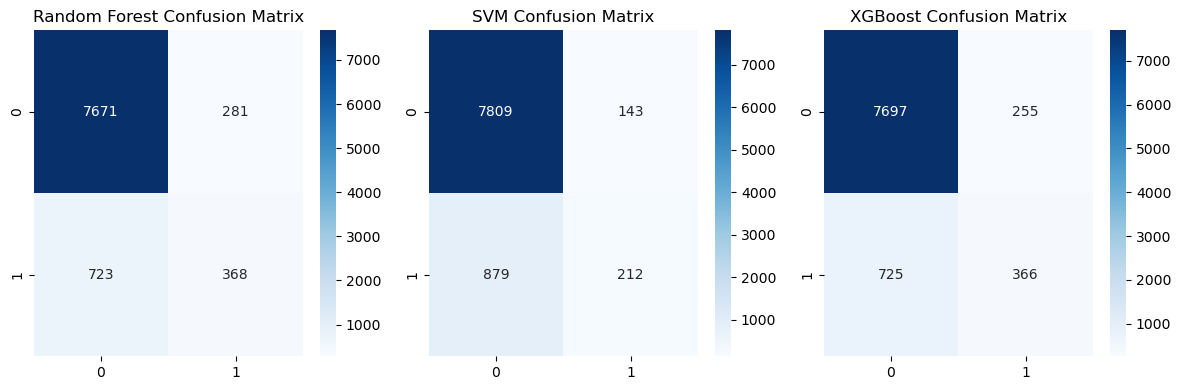

In [ ]:
# Plot Confusion Matrix
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.heatmap(rf_confusion_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Random Forest Confusion Matrix")

plt.subplot(1, 3, 2)
sns.heatmap(svm_confusion_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("SVM Confusion Matrix")

plt.subplot(1, 3, 3)
sns.heatmap(xgb_confusion_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("XGBoost Confusion Matrix")

plt.tight_layout()
plt.show()


In [ ]:
classifiers = ['Random Forest', 'SVM', 'XGBoost']
accuracies = [rf_accuracy, svm_accuracy, xgb_accuracy]
# Calculate accuracy scores
accuracy_scores = np.array([rf_accuracy, svm_accuracy, max(xgb_accuracy)])

# Find the index of the best performing algorithm
best_index = np.argmax(accuracy_scores)

# Get the name of the best performing algorithm
best_algorithm = classifiers[best_index]

# Print the best performing algorithm
print("The best performing algorithm is:", best_algorithm)

The best performing algorithm is: XGBoost


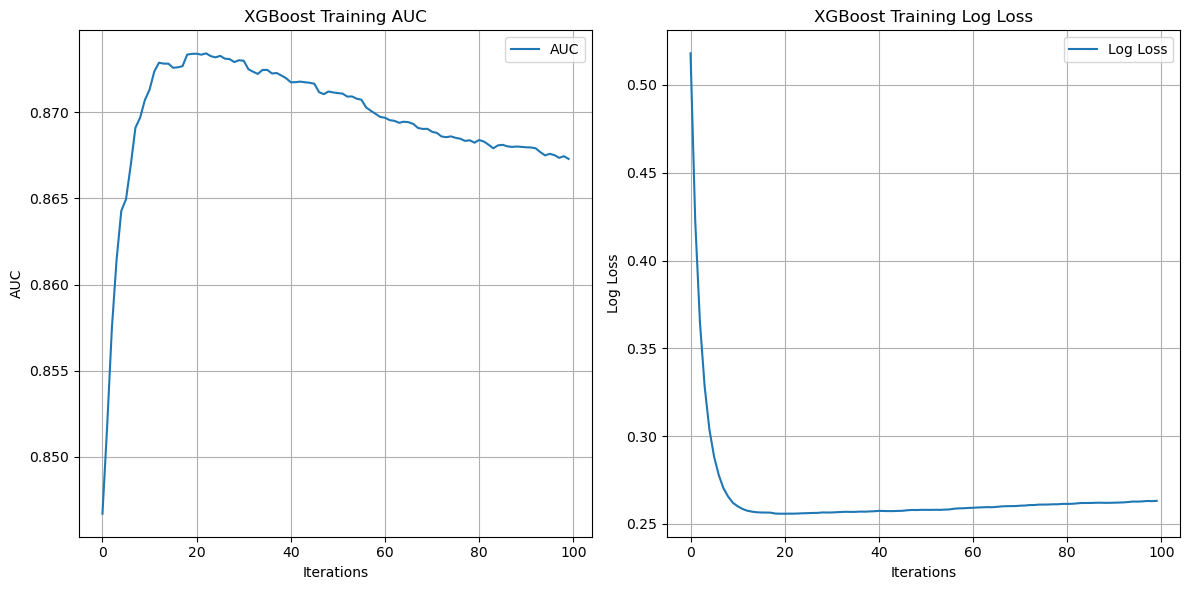

In [ ]:
# Plot AUC and Log Loss for the Best Performing Algorithm
plt.figure(figsize=(12, 6))

# AUC plot
plt.subplot(1, 2, 1)
plt.plot(xgb_auc, label='AUC')
plt.xlabel('Iterations')
plt.ylabel('AUC')
plt.title('XGBoost Training AUC')
plt.legend()
plt.grid(True)

# Log Loss plot
plt.subplot(1, 2, 2)
plt.plot(xgb_loss, label='Log Loss')
plt.xlabel('Iterations')
plt.ylabel('Log Loss')
plt.title('XGBoost Training Log Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
import random
random_index = random.randint(0, len(data) - 1)
random_data = X_scaled[random_index]
random_data = random_data.reshape(1, -1)
prediction = xgb_classifier.predict(random_data)
predicted_label = label_encoder.inverse_transform(prediction)[0]
actual_label = y[random_index]

In [ ]:
print(f'Actual Label: {actual_label}')
print(f'Predicted Label(XGBoost): {actual_label}')

Actual Label: no
Predicted Label(XGBoost): no
